# Prova Intermediária - Machine Learning

**Nome do aluno**: <font color='red'>Leonardo Sterman Freitas</font>

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta - pode consultar suas anotações, a web, o que quiser, menos perguntar para outros ou para as AIs. Faça o seu trabalho de maneira ética!

ChatGPT para perguntas teóricas não é permitido. CoPilot para código é permitido.

In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)


---

# Seção: Fundamentos


---

**Questão 1**: (2.5 pts) Matrizes e SVD



(a) (0.5 pts) Vamos criar uma matriz $A_{100 \times 4}$ de zeros:

In [147]:
# Criando uma matriz de zeros de tamanho 100x4.
A = np.zeros((100, 4))
A.shape

(100, 4)

In [148]:
# As primeiras 5 linhas da matriz A.
A[:5, :]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Agora preencha a matriz A com as seguintes especificações:

- A coluna $1$ tem uma lista de inteiros de $1$ a $100$. Pode usar `list` e `range` padrão do Python, ou pode usar `np.arange` ou `np.linspace` (que provavelmente é o jeito mais fácil).
- A coluna $2$ tem apenas o valor $1$ em todas as posições
- A coluna $3$ tem os inteiros de $101$ a $200$, assim como foi feito para a coluna $1$
- A coluna $4$ tem números aleatórios com distribuição gaussiana padrão (ou seja, média zero e desvio padrão $1$). Use a função `np.random.normal`.

Nota: lembre-se que em Matemática os índices começam em $1$, mas em Python (e em C, C++, JavaScript, Java, Rust, Go, etc.) os índices começam em zero, ok? Portanto $A_{5,3}$ em Matemática é `A[4,2]` em Python.


---

**Resposta**

In [149]:
A[:, 0] = np.arange(1, 101)

In [150]:
A[:, 1] = 1

In [151]:
A[:, 2] = np.arange(101, 201)

In [152]:
gauss = np.random.normal(0, 1, 100)

In [153]:
A[:, 3] = gauss

In [155]:
A[:10]

array([[  1.        ,   1.        , 101.        ,  -1.12676747],
       [  2.        ,   1.        , 102.        ,  -1.19392501],
       [  3.        ,   1.        , 103.        ,   0.14294309],
       [  4.        ,   1.        , 104.        ,   1.732515  ],
       [  5.        ,   1.        , 105.        ,   2.23130015],
       [  6.        ,   1.        , 106.        ,   0.6380511 ],
       [  7.        ,   1.        , 107.        ,   0.50084447],
       [  8.        ,   1.        , 108.        ,  -1.80105773],
       [  9.        ,   1.        , 109.        ,  -0.5426738 ],
       [ 10.        ,   1.        , 110.        ,  -0.78778375]])

---

A célula abaixo calcula a decomposição em valores singulares (SVD - *Singular Value Decomposition*) de $A$:

In [156]:
U, s, Vt = np.linalg.svd(A)

In [158]:
U.shape, s.shape, Vt.shape

((100, 100), (4,), (4, 4))

Responda as perguntas a seguir:

(b) (0.5 pts) Mostre que $U$ e $V$ são ortonormais, ou unitárias. Dica: em Python, o operador `@` multiplica matrizes. Dica: para escrever uma matriz usando poucos dígitos decimais, use o método `.round()` de matrizes - por exemplo, para escrever $M$ com dois dígitos, use `M.round(2)`.


---

**Resposta**

In [365]:
U = np.round(U.T @ U, 2)
Vt = np.round(Vt @ Vt.T, 2)

In [375]:
print(U.shape)
U[:10]

(100, 100)


array([[ 1.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
         0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
         0., -0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0., -0.,  0.,
        -0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,
        -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,  0.,  0.,  0., -0.,
        -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,  0.,
         0.,  0.,  0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,  0., -0.,
        -0., -0., -0., -0.,  0.,  0., -0., -0.,  0.],
       [ 0.,  1.,  0.,  0., -0.,  0., -0., -0.,  0.,  0.,  0., -0., -0.,
        -0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,
        -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,
         0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0., -0.,  0.,
        -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,
         0.,  0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0

In [373]:
Vt

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

---

(c) (0.5 pts) O array `s` contém apenas uma lista de números ao invés de ser uma matriz $100 \times 4$. Construa uma matriz $S$ que siga o padrão da SVD, ou seja, $1$ bloco diagonal com os valores de `s`, e um bloco de zeros. Dica: use as funções `np.diag`, `np.zeros` e `np.vstack`


---

**Resposta**

In [191]:
S = np.vstack([np.diag(s), np.zeros((96, 4))])
S[:10]

array([[1.62954431e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.77159705e+02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.04559247e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.78278729e-15],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

---

(d) (0.5 pts) Em `s` temos que o menor elemento é efetivamente zero, veja:

In [192]:
s.round(2)

array([1629.54,  177.16,   10.46,    0.  ])

*Baseado na construção de $A$*, explique porque o menor elemento de `s` é zero.


---

**Resposta**

In [193]:
A[:10]

array([[  1.        ,   1.        , 101.        ,  -1.12676747],
       [  2.        ,   1.        , 102.        ,  -1.19392501],
       [  3.        ,   1.        , 103.        ,   0.14294309],
       [  4.        ,   1.        , 104.        ,   1.732515  ],
       [  5.        ,   1.        , 105.        ,   2.23130015],
       [  6.        ,   1.        , 106.        ,   0.6380511 ],
       [  7.        ,   1.        , 107.        ,   0.50084447],
       [  8.        ,   1.        , 108.        ,  -1.80105773],
       [  9.        ,   1.        , 109.        ,  -0.5426738 ],
       [ 10.        ,   1.        , 110.        ,  -0.78778375]])

Baseado na construção de $A$, o menor elemento de $s$ é zero, uma vez que a coluna 2 de $A$ é composta apenas por 1s, o que faz com que a coluna 2 de $A$ seja linearmente dependente das outras colunas. Isso faz com que a matriz $A$ seja singular, ou seja, não-inversível, fazendo com que o menor valor singular seja 0.

---

(e) (0.5 pts) Efetue o produto $\boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^{T}$ e verifique que bate com $A$, a menos de precisão numérica. Dica: use a função `np.allclose` para verificar que dois arrays tem valores muito próximos.


---

**Resposta**

In [203]:
U, s, vT = np.linalg.svd(A)

A_refeita = U @ S @ vT
A_refeita[:10]

array([[  1.        ,   1.        , 101.        ,  -1.12676747],
       [  2.        ,   1.        , 102.        ,  -1.19392501],
       [  3.        ,   1.        , 103.        ,   0.14294309],
       [  4.        ,   1.        , 104.        ,   1.732515  ],
       [  5.        ,   1.        , 105.        ,   2.23130015],
       [  6.        ,   1.        , 106.        ,   0.6380511 ],
       [  7.        ,   1.        , 107.        ,   0.50084447],
       [  8.        ,   1.        , 108.        ,  -1.80105773],
       [  9.        ,   1.        , 109.        ,  -0.5426738 ],
       [ 10.        ,   1.        , 110.        ,  -0.78778375]])

In [195]:
A[:10]

array([[  1.        ,   1.        , 101.        ,  -1.12676747],
       [  2.        ,   1.        , 102.        ,  -1.19392501],
       [  3.        ,   1.        , 103.        ,   0.14294309],
       [  4.        ,   1.        , 104.        ,   1.732515  ],
       [  5.        ,   1.        , 105.        ,   2.23130015],
       [  6.        ,   1.        , 106.        ,   0.6380511 ],
       [  7.        ,   1.        , 107.        ,   0.50084447],
       [  8.        ,   1.        , 108.        ,  -1.80105773],
       [  9.        ,   1.        , 109.        ,  -0.5426738 ],
       [ 10.        ,   1.        , 110.        ,  -0.78778375]])

In [204]:
np.allclose(A, A_refeita)

True

---

**Questão 2** (2.0 pts) O algoritmo de minimização por descida do gradiente funciona da seguinte forma:

- Comece por um ponto de partida qualquer
- Loop:
    - Atualize a estimativa do minimo, adicionando um pequeno multiplo (taxa de aprendizagem) do negativo do gradiente.
    - Se a atualização foi negligível, pare o loop

Eis uma implementação:

In [206]:
def gradient_descent(f, g, x0, eta=0.01, tol=1e-6, max_iter=1000):
    """Algoritmo de otimização do gradiente descendente.

    Args:
        f (callable): Função objetivo.
        g (callable): Gradiente da função objetivo.
        x0 (np.ndarray): Ponto inicial.
        alpha (float): Taxa de aprendizado.
        tol (float): Tolerância para o critério de parada.
        max_iter (int): Número máximo de iterações.
    
    Returns:
        np.ndarray: Ponto ótimo.
    """
    x = x0
    for i in range(max_iter):
        x_new = x - eta * g(x)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    if i == max_iter - 1:
        print("Aviso: número máximo de iterações atingido!")
    return x_new

Nesta implementação você passa *funções* `f(x)` e `g(x)` que computam o valor da função a ser otimizada, e o seu gradiente. Por exemplo, vamos minimizar a função $f(x) = x^2 -4 x + 1$. Seu gradiente é apenas uma derivada simples, pois essa função tem apenas uma variável, e vale $g(x) = 2 x - 4$.

In [207]:
def f(x):
    return x**2 - 4*x + 1

def g(x):
    return 2*x - 4

In [208]:
x_plot = np.linspace(-3, 7, 100)
f_plot = f(x_plot)
g_plot = g(x_plot)

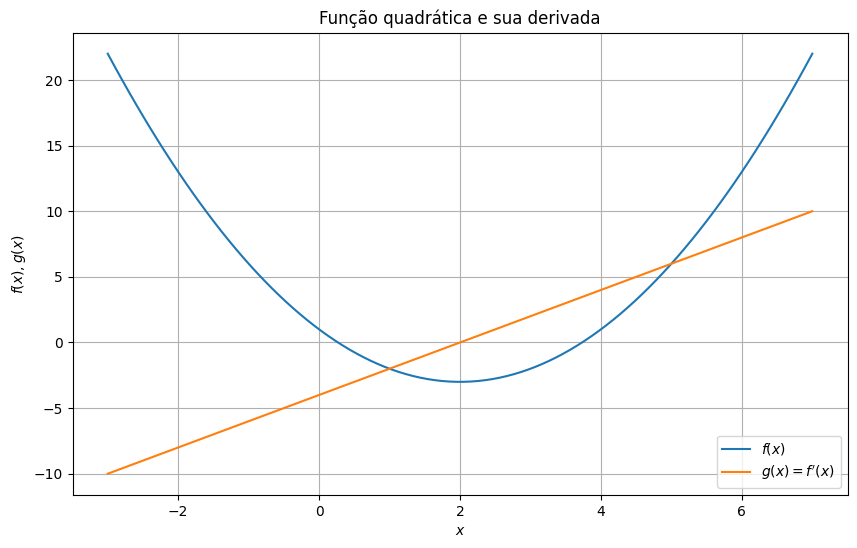

In [209]:
plt.figure(figsize=(10, 6))
plt.plot(x_plot, f_plot, label=r'$f(x)$')
plt.plot(x_plot, g_plot, label=r'$g(x) = f^{\prime}(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x), g(x)$')
plt.title('Função quadrática e sua derivada')
plt.legend()
plt.grid()
plt.show()

(a) (0.5 pts) Pelo método analítico, qual o ponto de mínimo de $f(x)$?


---

**Resposta**

Pelo método analítico, que é a derivada da função $f(x)$ igualada a zero e a função tendo concavidade para baixo, temos que o ponto de mínimo de $f(x)$ é $x = 2$. Além disso, pode-se simplesmente olhar no gráfico e observar que quando $x = 2$, a função assume o menor valor.

---

(b) (0.5 pts) Usando a função `gradient_descent` acima podemos achar o mínimo numericamente, veja:

In [210]:
x_min = gradient_descent(f, g, -2, eta=0.1, tol=1e-6, max_iter=1000)
print(f"O ponto ótimo é {x_min:.2f}.")

O ponto ótimo é 2.00.


Vamos achar o mínimo numericamente, usando a função `gradient_descent` acima com `eta = 1e-4`, `tol=1e-6` e `max_iter=1000`. O valor correto não será encontrado:

In [211]:
x_min = gradient_descent(f, g, -2, eta=1e-4, tol=1e-6, max_iter=1000)
print(f"O ponto ótimo é {x_min:.2f}.")

Aviso: número máximo de iterações atingido!
O ponto ótimo é -1.27.


Explique porque isso aconteceu e como resolver esse problema. Dica: pode modificar a função `gradient_descent` para escrever informações diagnósticas conforme o algoritmo avança.


---

**Resposta**

Nesse caso, quando mudamos a taxa de aprendizagem $eta$, a função $gradient_descent$ deixa de encontrar o valor correto, uma vez que a taxa de aprendizagem é muito baixa. Isso ocorre já que o gradiente da função $f(x)$ é muito pequeno, fazendo com que o algoritmo de descida do gradiente atualize muito pouco o valor de $x$ a cada iteração, fazendo com que o algoritmo não consiga convergir para o valor correto. Para resolver esse problema, podemos aumentar a taxa de aprendizagem $eta$.

---

(c) (0.5 pts) Agora vamos tentar de novo mas com `eta = 1e4`, `tol=1e-6` e `max_iter=1000`. O valor correto não será encontrado:

In [213]:
x_min = gradient_descent(f, g, -2, eta=1e4, tol=1e-6, max_iter=1000)
print(f"O ponto ótimo é {x_min:.2f}.")

Aviso: número máximo de iterações atingido!
O ponto ótimo é nan.


Explique porque isso aconteceu e como resolver esse problema. Dica: pode modificar a função `gradient_descent` para escrever informações diagnósticas conforme o algoritmo avança.


---

**Resposta**

Nesse caso, que possui o mesmo problema que o último (onde a taxa de aprendizagem não tem um valor adequado), a taxa de aprendizagem está muito alta, fazendo com que o algoritmo de descida do gradiente atualize muito o valor de $x$ a cada iteração, fazendo com que o algoritmo não consiga convergir para o valor correto. Para resolver esse problema, podemos diminuir a taxa de aprendizagem $eta$. 

---

(d) (0.5 pts) Vamos explorar agora outra função: $f(x) = x^4 - (52 / 3) x^3 + 108 x^2 - 288 x + 290$. A derivada de $f(x)$ é $g(x) = 4 x^3 - 52 x^2 + 216 x - 288$. Veja os gráficos abaixo.

In [260]:
def f(x):
    return x**4 - (52 / 3) * x**3 + 108 * x**2 - 288 * x + 290


def g(x):
    return 4 * x**3 - 52 * x**2 + 216 * x - 288

In [44]:
x_plot = np.linspace(2, 7, 100)
f_plot = f(x_plot)
g_plot = g(x_plot)

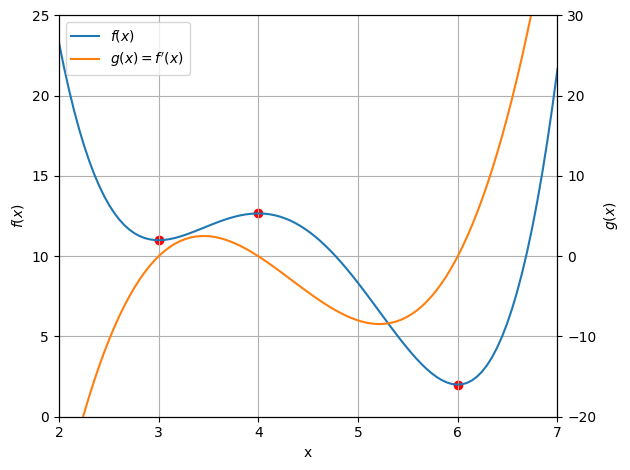

In [45]:
fig, ax1 = plt.subplots()

color1 = 'tab:blue'
lines1 = ax1.plot(
    x_plot,
    f_plot,
    color=color1,
    label=r'$f(x)$',
)
ax1.scatter(
    [3, 4, 6],
    [f(3), f(4), f(6)],
    color='red',
)
ax1.set_xlabel('x')
ax1.set_xlim(2, 7)
ax1.set_ylim(0, 25)
ax1.set_ylabel(r'$f(x)$')

ax2 = ax1.twinx()
color2 = 'tab:orange'
lines2 = ax2.plot(
    x_plot,
    g_plot,
    color=color2,
    label=r'$g(x) = f^{\prime}(x)$',
)
ax2.set_ylim(-20, 30)
ax2.set_ylabel(r'$g(x)$')

lines = lines1 + lines2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')
ax1.grid()

fig.tight_layout()
plt.show()

O que aconteceu com o `gradient_descent` se ao buscamos achar o mínimo a partir de $x_{\text{inicial}} = 2$ paramos em $x = 3$ ao invés do ponto ótimo $x = 6$? Explique com suas palavras, e monte um exemplo de código (i.e. chame a função `gradient_descent` com os parâmetros necessários) para demonstrar este fenômeno.


---

**Resposta**

Se ao buscarmos achar o ponto mínimo da função a partir de $x_{\text{inicial}} = 2$ paramos em $x = 3$ ao invés do ponto ótimo $x = 6$. Isso ocorre uma vez que os parâmetros de chamada do algoritmo de descida do gradiente não são adequados para encontrar o mínimo global da função $f(x)$, e sim para encontrar o primeiro mínimo local que o algoritmo encontra. Para resolver esse problema, podemos aumentar o número máximo de iterações `max_iter` e/ou aumentar a taxa de aprendizagem $eta$. O código abaixo resolve o problema:

In [261]:
# encontrado o ponto otimo x =6
x_min = gradient_descent(f, g, 6, eta=1e-8, tol=1e-6, max_iter=10000)
print(f"O ponto ótimo é {x_min:.2f}.")

O ponto ótimo é 6.00.


---

# Seção: Técnicas

**Questão 3** (2.0 pts) Clustering

(a) (0.5 pts) A função abaixo constroi um dataset simulado com 3 clusters:

In [46]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=300,
    centers=3,
    n_features=2,
    cluster_std=0.5,
    random_state=0,
)

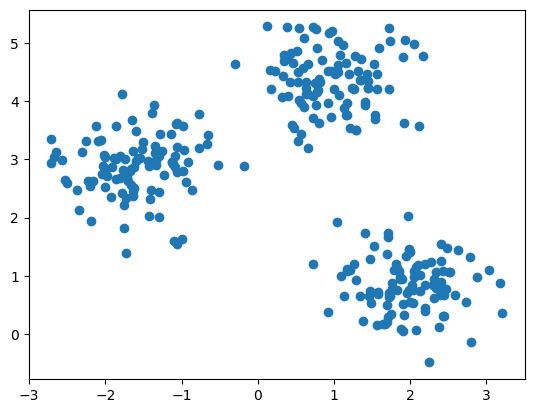

In [49]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Execute uma clusterização `KMeans` e visualize o resultado, explique se o resultado é razoável.


---

**Resposta**

[[ 0.96  4.36]
 [-1.59  2.87]
 [ 1.97  0.85]]


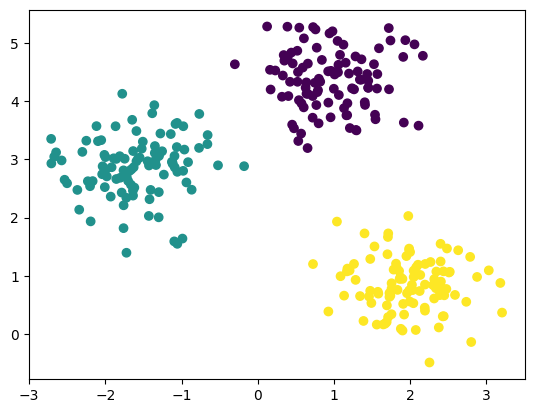

In [287]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

print(np.around(kmeans.cluster_centers_, 2))

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

Para um kmeans com 3 clusters, o reusltado é bem razoável pois eles foram bem separados, indicando que o algoritmo conseguiu dividir bem os dados em 3 clusters.

---

(b) (0.5 pts) Calcule o *silhouette score* do seu clustering (`sklearn.metrics.silhouette_score`)


---

**Resposta**

In [288]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.716534980258917

---

(c) (0.5 pts) Agora vamos multiplicar a primeira coluna de $X$ por $10000$

In [289]:
X_bad = X.copy()
X_bad[:, 0] = X_bad[:, 0] * 10_000

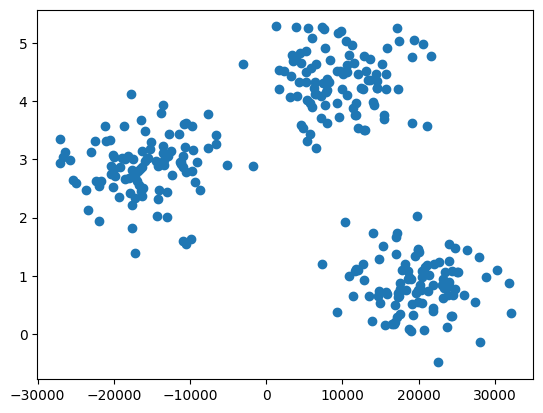

In [290]:
plt.figure()
plt.scatter(X_bad[:, 0], X_bad[:, 1])
plt.show()

Execute uma clusterização `KMeans` neste novo dataset e explique se o resultado é uma clusterização razoável.


---

**Resposta**

[[ 1.473099e+04  2.590000e+00]
 [-1.581768e+04  2.890000e+00]]


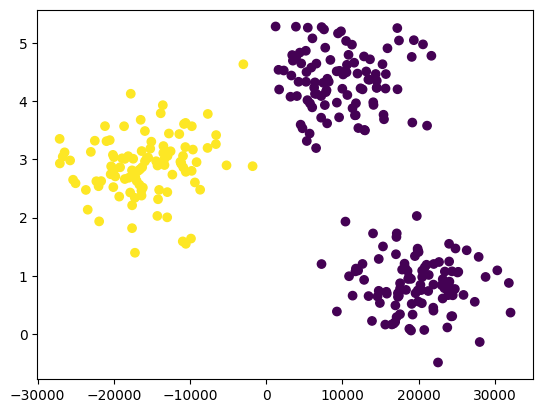

In [291]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_bad)

print(np.around(kmeans.cluster_centers_, 2))

plt.scatter(X_bad[:, 0], X_bad[:, 1], c=kmeans.labels_)

Para um kmeans com 2 clusters, o resultado é razoável pois eles foram bem separados, indicando que o algoritmo conseguiu dividir bem os dados em 2 clusters.

---

(d) (0.5 pts) Calcule o *silhouette score* do seu novo clustering e compare com o score do item (b)


---

**Resposta**

In [292]:
from sklearn.metrics import silhouette_score

silhouette_score(X_bad, kmeans.labels_)

0.7433644451973516

O clusterização do item (d) possui um *silhouette score* (0.74) maior do que o do item (b) (0.71), indicando que a clusterização do item (d) é melhor do que a do item (b).

---

**Questão 4** (3.5 pts) Regressão

(a) (0.5 pts) Explique porque ao construir a equação normal temos que adicionar uma coluna de $1s$ na matriz $X$.


---

**Resposta**

É necessário adicionar uma coluna de 1s na matriz $X$, uma vez que para construir a equação normal é necessário obter o vetor de pesos $\boldsymbol{w}$, que é calculado como:

$\boldsymbol{w} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}$. 

E para esse vetor ser construído, é necessário que a matriz $\boldsymbol{X}$ possua uma coluna de 1s, que é a coluna que representa o termo de bias, fazendo com que o vetor de pesos $\boldsymbol{w}$ possa ser calculado corretamente.

---

(b) (3.0 pts) Construa um projeto de regressão sobre os dados do dataset "Liver disorders" do OpenML (https://www.openml.org/search?type=data&status=active&id=8). Para sua conveniência eu já salvei os dados em um arquivo *pickle*:

In [299]:
import pickle

with open('liver.pkl', 'rb') as f:
    data = pickle.load(f)

In [300]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Itens a serem avaliados:

- Análise exploratória (1.0 pt)
- Feature engineering (apenas se realmente necessário) e construção do modelo (1.0 pt)
- Análise de desempenho (split treino-teste, métricas de desempenho, etc. Não me importa se o erro vai ser baixo, quero ver se a técnica é correta.) (1.0 pt)

Boa prova!


---

**Resposta**

In [324]:
X = data['data']
y = data['target']

### Análise exploratória

In [332]:
ser_y = pd.Series(y)
ser_y.describe()

count    345.000000
mean       3.455072
std        3.337835
min        0.000000
25%        0.500000
50%        3.000000
75%        6.000000
max       20.000000
Name: drinks, dtype: float64

In [333]:
df = pd.DataFrame(X, columns=data['feature_names'])
df.head()

,mcv,alkphos,sgpt,sgot,gammagt
0,85,92,45,27,31
1,85,64,59,32,23
2,86,54,33,16,54
3,91,78,34,24,36
4,87,70,12,28,10


In [334]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mcv,345.0,90.159420,4.448096,65.0,87.0,90.0,93.0,103.0
alkphos,345.0,69.869565,18.347670,23.0,57.0,67.0,80.0,138.0
sgpt,345.0,30.405797,19.512309,4.0,19.0,26.0,34.0,155.0
sgot,345.0,24.643478,10.064494,5.0,19.0,23.0,27.0,82.0
gammagt,345.0,38.284058,39.254616,5.0,15.0,25.0,46.0,297.0


In [313]:
df[df['mcv'] > 100].sort_values('mcv', ascending=False)

,mcv,alkphos,sgpt,sgot,gammagt,target
68,103,75,19,30,13,1.0
236,101,65,18,21,22,0.5


In [321]:
df[df['alkphos'] > 120].sort_values('alkphos', ascending=False)

,mcv,alkphos,sgpt,sgot,gammagt,target
122,90,134,14,20,14,4.0
328,98,123,28,24,31,8.0
336,86,123,20,25,23,10.0


In [323]:
df[df['sgot'] > 50].sort_values('sgot', ascending=False)

,mcv,alkphos,sgpt,sgot,gammagt,target
299,94,43,154,82,121,4.0
232,98,74,148,75,159,0.5
35,91,72,155,68,82,0.5
185,95,80,50,64,55,10.0
316,98,66,103,57,114,6.0
285,94,117,77,56,52,4.0


### Separação treino-teste

In [350]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

X.shape, X_train.shape, X_test.shape

((345, 5), (276, 5), (69, 5))

### Feature Engineering

array([[<Axes: title={'center': 'mcv'}>,
        <Axes: title={'center': 'alkphos'}>],
       [<Axes: title={'center': 'sgpt'}>,
        <Axes: title={'center': 'sgot'}>],
       [<Axes: title={'center': 'gammagt'}>, <Axes: >]], dtype=object)

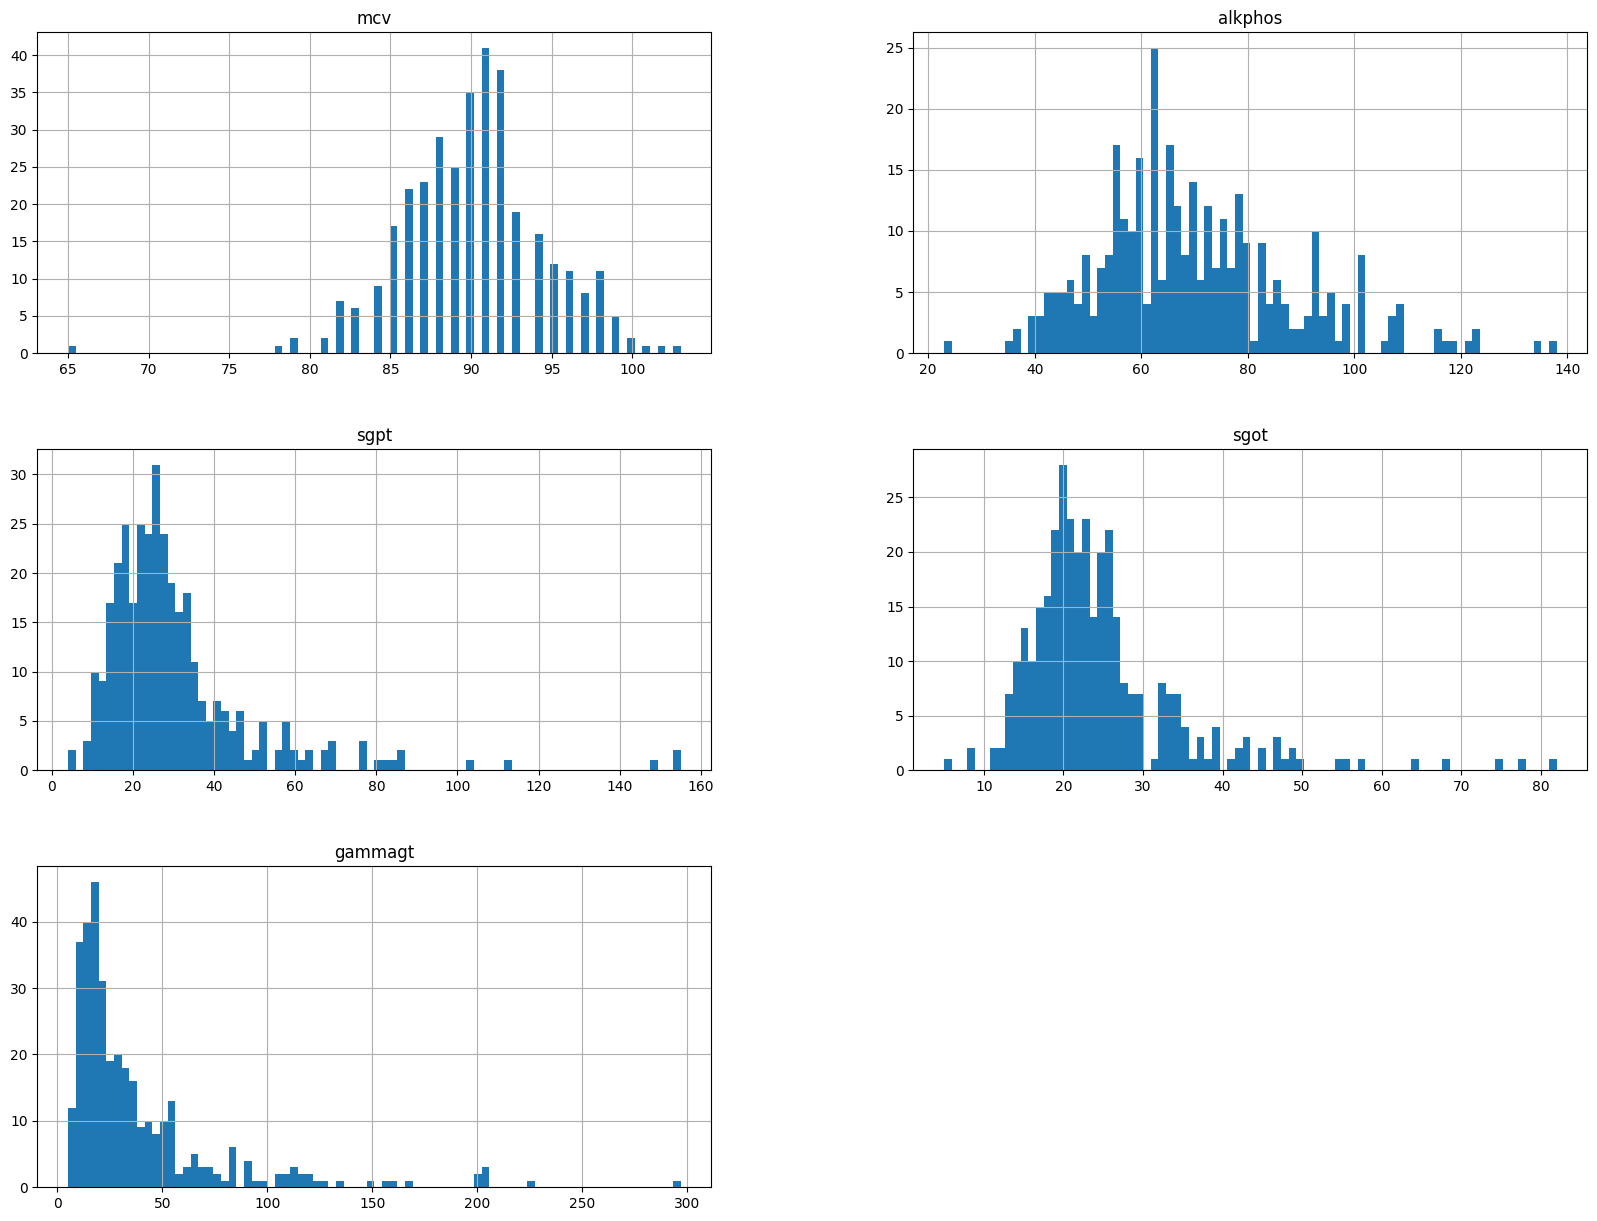

In [352]:
df.hist(bins=80, figsize=(20, 15))

### Removendo outliers

In [354]:
def filtra_dados(X,y, columns):
    df = pd.DataFrame(X, columns=columns)
    df['target'] = y
    df = df[
        (df['mcv'] > 75) &
        (df['alkphos'] < 120) &
        (df['sgpt'] < 100) &
        (df['sgot'] < 60) &
        (df['gammagt'] < 200)
    ]
    X_filt = df[columns].values
    y_filt = df['target'].values
    return X_filt, y_filt

In [355]:
X_train_filt, y_train_filt = filtra_dados(X_train, y_train, data['feature_names'])
X_test_filt, y_test_filt = filtra_dados(X_test, y_test, data['feature_names'])

In [356]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(
    X_train_filt,
    y_train_filt,
    test_size=0.2,
    random_state=42,
)

### Treinando e fazendo o modelo

In [361]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Erro quadrático médio: 7.07603527613855


c:\Users\leosf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


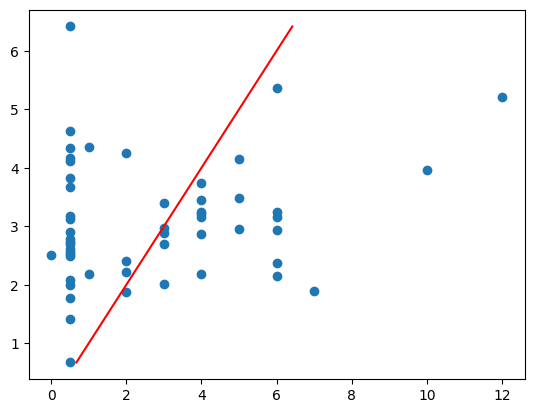

In [379]:
y_pred = model.predict(X_valid_)

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_valid_, y_pred)

print("Erro quadrático médio:", rmse)

x_aux = np.linspace(y_pred.min(), y_pred.max(), 100)
plt.plot(x_aux, x_aux, color='red')
plt.scatter(y_valid_, y_pred)